In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1- Init_params(nx, nh, ny)


In [2]:
def init_params(nx,nh,ny):

    # Input - Hidden layer
    W1 = np.random.normal(0,0.3,size=(nh,nx+1))

    # Hidden - Output layer
    W2 = np.random.normal(0,0.3,size=(ny,nh+1))

    parameters = {
                  "W1": W1,
                  "W2": W2,
                  }

    return parameters

# 2- forward (params, X)

### Helper functions

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


In [4]:
def forward(params, X):
    W1 = params["W1"]
    W2 = params["W2"]

    # Transpose X to match the dimensions
    X = X.T

    # Linear transformation for the hidden layer
    Z1 = np.dot(W1, X)

    # Activation function for the hidden layer (tanh)
    A1 = np.tanh(Z1)
    m = A1.shape[1]
    A1=np.r_[np.ones((1,m)),A1]
    # Linear transformation for the output layer
    Z2 = np.matmul(W2, A1)

    # Softmax activation function for the output layer

    Y = softmax(Z2)
    # Store intermediate values in cache for backward pass
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "Y": Y
    }

    return cache , Y

# 3- loss_accuracy (Yhat, Y)

In [5]:
def loss_accuracy(y, y_hat):
   y=y.transpose()
   epsilon = 1e-10  # Small constant to avoid log(0)
   loss = -np.sum(y * np.log(y_hat)) / y.shape[1]
   accuracy = np.mean(np.argmax(y_hat, axis=0) == np.argmax(y, axis=0))

   return loss, accuracy

# 4- backward (params, outputs, Y)

In [6]:
def backward(X, params, outputs, y_hat, y):
    W1 = params["W1"]
    W2 = params["W2"]
    y= y.transpose()
    z1=outputs['Z1']

    A1 = outputs["A1"]

    z2=outputs['Z2']

    A2 = outputs["Y"]

    #  the error between the predicted output (y_hat) and the true labels (y)
    dA2 = y_hat - y

    # Gradients of softmax
    dZ2 = softmax(z2) * ( 1- softmax(z2))

    #he chain rule to calculate the gradients with respect to the weights (dW2) and biases of the output layer.
    dW2 = np.dot(dA2 * dZ2, A1.transpose())

    # intermediate values
    dz2_da1=W2[:,1:]
    da1_dZ1 = 1- np.tanh(z1)**2
    dz1_dw1 = X
    dj_dz2 = dA2 * dZ2

    # Gradient of the loss with respect to the hidden layer activations A1
    dj_da1 = np.dot(dj_dz2.transpose(),dz2_da1 )
    dj_dz1 = dj_da1.transpose() * da1_dZ1
    dW1 = np.dot(dj_dz1, dz1_dw1)

    # Store gradients in a dictionary
    grads = {
        "dW1": dW1,
        "dW2": dW2,
    }

    return grads

In [7]:
params = init_params(2,2,4)
params


{'W1': array([[ 0.02804537, -0.03927296,  0.23142325],
        [-0.11273155, -0.33696958,  0.6462358 ]]),
 'W2': array([[ 0.46105012, -0.28717939, -0.18110963],
        [ 0.41843433, -0.52776676, -0.11875707],
        [ 0.04088667, -0.02588073,  0.06161582],
        [-0.12566142,  0.24557389,  0.19494836]])}

In [8]:
X=np.array([[0.5403, -0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
X.shape

(3, 2)

In [9]:
m = X.shape[0]
X=np.c_[np.ones((m,1)),X]
X

array([[ 1.    ,  0.5403, -0.4161],
       [ 1.    , -0.99  , -0.6536],
       [ 1.    ,  0.2837,  0.9602]])

In [10]:
outputs,y_hat = forward(params,X)
y_hat

array([[0.33863601, 0.32555614, 0.2919079 ],
       [0.32115812, 0.31443052, 0.27088761],
       [0.19199766, 0.19936296, 0.2241541 ],
       [0.14820821, 0.16065038, 0.21305039]])

In [11]:
sum_of_softmax = np.sum(y_hat)
print(f"Sum of Softmax values: {sum_of_softmax}")

Sum of Softmax values: 3.0


In [12]:
y=np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])

In [13]:
loss,accuracy=loss_accuracy(y, y_hat)
loss

1.5205169357076855

In [14]:
grads=backward(X,params,outputs, y_hat ,y)
grads['dW1'].shape

(2, 3)

# 5- sgd(params, grads, eta)

In [15]:
def sgd(params, grads, eta):

     params['W1']-=eta*grads['dW1']
     params['W2']-=eta*grads['dW2']
     return params

In [16]:
sgd(params, grads, eta=0.01)

{'W1': array([[ 0.02859706, -0.03811411,  0.23177289],
        [-0.11237286, -0.33665774,  0.64632851]]),
 'W2': array([[ 0.45897351, -0.28719317, -0.18081568],
        [ 0.41867697, -0.52795417, -0.11890215],
        [ 0.04161987, -0.02551076,  0.06235787],
        [-0.12515992,  0.24541235,  0.19430282]])}

# 6- Training steps

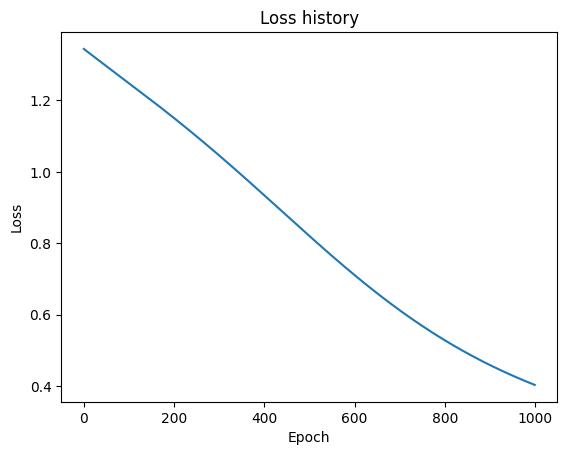

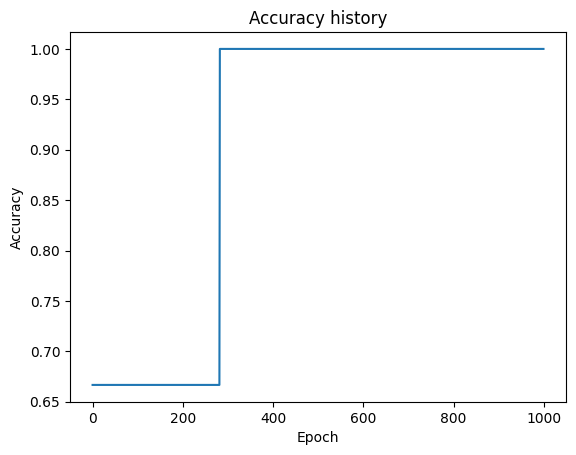

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Network parameters
nx = 2
nh = 2
ny = 4
params = init_params(nx, nh, ny)

# Hyperparameters
num_epochs = 1000
eta = 0.01

# Training loop
loss_history = []
accuracy_history = []
for i in range(num_epochs):
    # Forward pass
    cache , y_hat = forward(params, X)

    # Compute loss and accuracy
    loss,accuracy = loss_accuracy(y, y_hat)

    # Save loss and accuracy
    loss_history.append(loss)
    accuracy_history.append(accuracy)

    # Backward pass
    grads = backward(X, params, cache, y_hat, y)

    # Update parameters
    params = sgd(params, grads, eta)

# Plot loss and accuracy history
plt.plot(loss_history)
plt.title("Loss history")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(accuracy_history)
plt.title("Accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# 7- MNIST dataset

In [18]:
import tensorflow as tf
import tensorflow.keras as keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [19]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


### Reshaing

In [20]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [21]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 784)
y_train: (60000,)
x_test:  (10000, 784)
y_test:  (10000,)


# Normalization -->  (X — Xmin)/(Xmax-Xmin) = X/255

In [22]:
x_train=x_train/255
x_test=x_test/255

# Labeling  (one hot encoding)

In [23]:
from keras.utils import to_categorical
print("class label for first image",y_train[0])
y_train=tf.keras.utils.to_categorical(y_train,10)
#y_test=tf.keras.utils.to_categorical(y_test,10)
print("class label for first image after labeling",y_train[0])

class label for first image 5
class label for first image after labeling [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
y_train.shape

(60000, 10)

In [25]:
nx = x_train.shape[1]
nh = 32
ny = y_train.shape[1]

In [26]:
params=init_params(nx,nh,ny)
params['W1'].shape

(32, 785)

# adding the bias term for x_train and x_test

In [27]:
m = x_train.shape[0]
x_train=np.c_[np.ones((m,1)),x_train]
x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [28]:
import matplotlib.pyplot as plt
def create_mini_batches(X, y, params, batch_size=128, epochs=20, eta=0.01):
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        #random data
        shuffle_indices = np.random.permutation(len(X))
        X= X[shuffle_indices]
        y = y[shuffle_indices]


        for i in range(0, len(X), batch_size):
            #Load a batch of data
            x_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            #compute the model's predictions (y_hat) and intermediate values (outputs) for the current batch.
            outputs, y_hat = forward(params, x_batch)

            # compute the model's predictions (y_hat) and intermediate values (outputs) for the current batch.
            grads = backward(x_batch, params, outputs, y_hat, y_batch)

            # update the model parameters
            params = sgd(params, grads, eta)

            # Calculates the loss and accuracy for the current mini-batch
            batch_loss, batch_accuracy = loss_accuracy(y_batch, y_hat)

            # Adds the batch loss and number of correct predictions to the respective running totals
            total_loss += batch_loss
            correct_predictions += batch_accuracy * len(y_batch)

        average_loss = total_loss / (len(X) // batch_size)
        accuracy = correct_predictions / len(X)

        loss_history.append(average_loss)
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {average_loss:.4f} - Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label=' Loss')
    plt.title(' Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_history, label=' Accuracy')
    plt.title(' Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Epoch 1/50 - Loss: 0.7453 - Accuracy: 0.7793
Epoch 2/50 - Loss: 0.3727 - Accuracy: 0.8959
Epoch 3/50 - Loss: 0.3178 - Accuracy: 0.9133
Epoch 4/50 - Loss: 0.2874 - Accuracy: 0.9232
Epoch 5/50 - Loss: 0.2644 - Accuracy: 0.9299
Epoch 6/50 - Loss: 0.2469 - Accuracy: 0.9354
Epoch 7/50 - Loss: 0.2333 - Accuracy: 0.9395
Epoch 8/50 - Loss: 0.2221 - Accuracy: 0.9429
Epoch 9/50 - Loss: 0.2126 - Accuracy: 0.9467
Epoch 10/50 - Loss: 0.2046 - Accuracy: 0.9485
Epoch 11/50 - Loss: 0.1971 - Accuracy: 0.9513
Epoch 12/50 - Loss: 0.1913 - Accuracy: 0.9525
Epoch 13/50 - Loss: 0.1850 - Accuracy: 0.9546
Epoch 14/50 - Loss: 0.1799 - Accuracy: 0.9562
Epoch 15/50 - Loss: 0.1751 - Accuracy: 0.9573
Epoch 16/50 - Loss: 0.1709 - Accuracy: 0.9593
Epoch 17/50 - Loss: 0.1667 - Accuracy: 0.9603
Epoch 18/50 - Loss: 0.1624 - Accuracy: 0.9621
Epoch 19/50 - Loss: 0.1590 - Accuracy: 0.9637
Epoch 20/50 - Loss: 0.1551 - Accuracy: 0.9641
Epoch 21/50 - Loss: 0.1521 - Accuracy: 0.9654
Epoch 22/50 - Loss: 0.1495 - Accuracy: 0.96

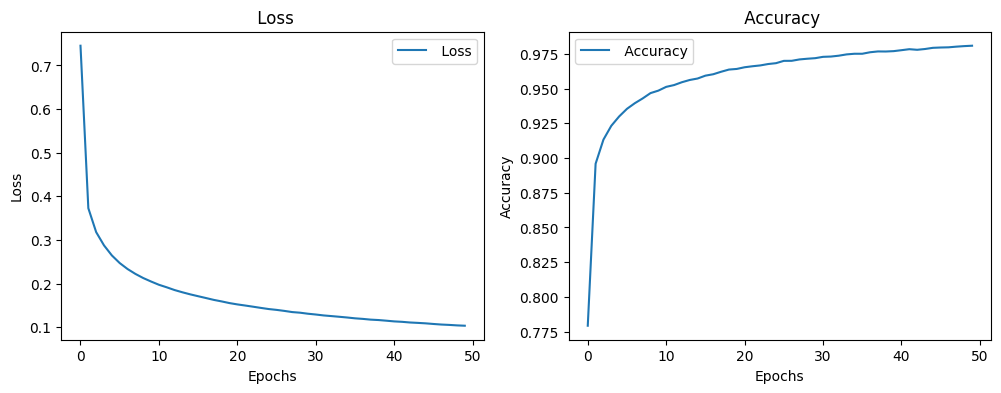

In [29]:
create_mini_batches(x_train,y_train,params,batch_size=128,epochs=50,eta=0.01)

# Trying on the test data

In [30]:
y_test_2= y_test
y_test=tf.keras.utils.to_categorical(y_test,10)

In [31]:
nx_test = x_test.shape[1]
nh_test = 32
ny_test = y_test.shape[1]

In [32]:
params=init_params(nx_test,nh_test,ny_test)

In [33]:
m = x_test.shape[0]
x_test=np.c_[np.ones((m,1)),x_test]
x_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Epoch 1/50 - Loss: 1.5259 - Accuracy: 0.5300
Epoch 2/50 - Loss: 0.7296 - Accuracy: 0.7874
Epoch 3/50 - Loss: 0.5386 - Accuracy: 0.8501
Epoch 4/50 - Loss: 0.4595 - Accuracy: 0.8742
Epoch 5/50 - Loss: 0.4096 - Accuracy: 0.8920
Epoch 6/50 - Loss: 0.3743 - Accuracy: 0.9027
Epoch 7/50 - Loss: 0.3495 - Accuracy: 0.9091
Epoch 8/50 - Loss: 0.3285 - Accuracy: 0.9171
Epoch 9/50 - Loss: 0.3114 - Accuracy: 0.9221
Epoch 10/50 - Loss: 0.2976 - Accuracy: 0.9280
Epoch 11/50 - Loss: 0.2881 - Accuracy: 0.9312
Epoch 12/50 - Loss: 0.2755 - Accuracy: 0.9346
Epoch 13/50 - Loss: 0.2725 - Accuracy: 0.9384
Epoch 14/50 - Loss: 0.2596 - Accuracy: 0.9401
Epoch 15/50 - Loss: 0.2507 - Accuracy: 0.9443
Epoch 16/50 - Loss: 0.2467 - Accuracy: 0.9461
Epoch 17/50 - Loss: 0.2401 - Accuracy: 0.9497
Epoch 18/50 - Loss: 0.2330 - Accuracy: 0.9508
Epoch 19/50 - Loss: 0.2276 - Accuracy: 0.9529
Epoch 20/50 - Loss: 0.2183 - Accuracy: 0.9537
Epoch 21/50 - Loss: 0.2128 - Accuracy: 0.9561
Epoch 22/50 - Loss: 0.2073 - Accuracy: 0.95

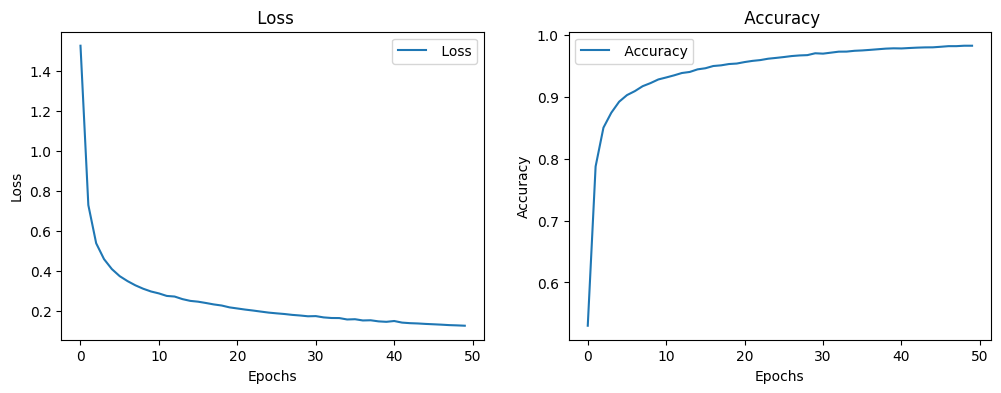

In [34]:
create_mini_batches(x_test,y_test,params,batch_size=128,epochs=50,eta=0.01)

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = x_train.astype('float32') / 255  # Normalize pixel values
x_test = x_test.astype('float32') / 255

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [36]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28, 28)  # Keep images as 2D matrices
x_test = x_test.reshape(-1, 28, 28)

In [37]:
def make_predictions(params, X):

    _, A3 = forward(params, X) # Get class predictions from A3

    predictions = get_predictions(A3)  # Get class predictions from A3

    return predictions

In [38]:
def get_predictions(A3):

  # Find the index of the maximum value in each row
  predictions = np.argmax(A3, 0)

  return predictions

In [39]:
# Test predictions
def test_prediction(params, index):
    """Tests the model on a specific image from the test set.

    Args:
        params (dict): Model parameters.
        index (int): Index of the image to test in the test set.

    Returns:
        None
    """

    # Reshape to a 2D array with a bias term (correct approach for your model)
    current_image = x_test[index].reshape(-1, 1)
    current_image = np.concatenate([current_image, np.ones((1, 1))], axis=0)  # Concatenate along axis 0


    prediction = make_predictions(params, current_image.T)  # Transpose after verification
    label = y_test[index]

    print(f"Prediction: {prediction}")
    print(f"Label: {label}")

    plt.gray()
    plt.imshow(current_image[:-1].reshape(28, 28), interpolation='nearest')  # Exclude bias term for visualization
    plt.show()

Prediction: [7]
Label: 7


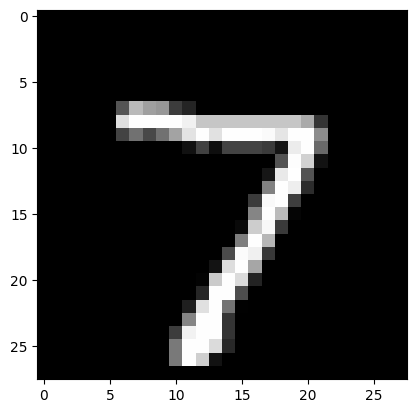

Prediction: [2]
Label: 2


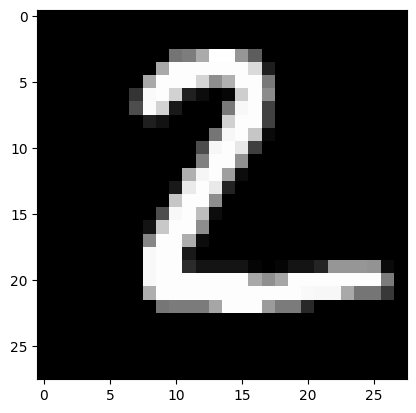

Prediction: [1]
Label: 1


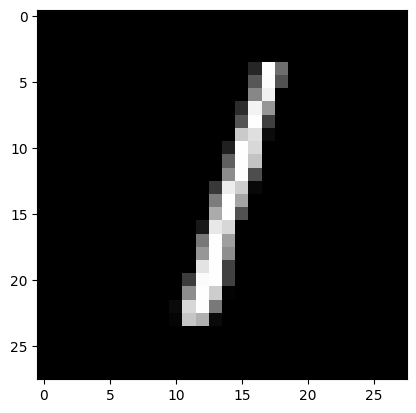

Prediction: [7]
Label: 0


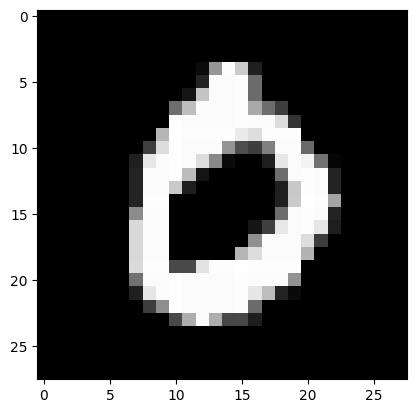

Prediction: [4]
Label: 4


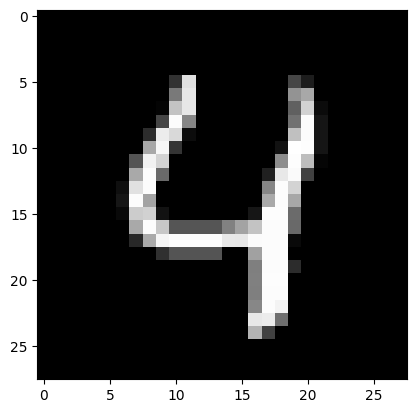

In [40]:
for i in [0,1,2,3,4]:
    test_prediction(params,i)